In [1]:
# This script loads the images from /Users/avesga/Code/radialsym and analyzes them with eSRRF3D
# test version to have everything working, later on we will use an automatic python script

# agv, 19Mar2023

import os

import stackview
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from nanopyx.methods.esrrf_3d.run import run_esrrf3d

from nanopyx.core.transform._le_esrrf3d import eSRRF3D

In [18]:
# set parameters

path = "/Users/avesga/Code/radialsym/simulations/FULL_distance_emitters_0.5_px_size_0.02_int_f_1500_offset_200_int_noise_100.tiff"

In [19]:
# Load file

img = imread(path).astype(np.float32)

In [20]:
# Define variables for eSRRF

magnification_xy=2
magnification_z=2
radius=1
radius_z = 1
ratio_px = 1
sensitivity=2
run_type="Threaded"
correlation="AVG"
framewindow=0
rollingoverlap=2

In [21]:
# esrrf3d
esrrf = eSRRF3D()

rgc_img = run_esrrf3d(img, magnification_xy=magnification_xy, magnification_z=magnification_z, radius=radius, radius_z =radius_z, ratio_px = ratio_px, sensitivity=sensitivity, run_type=run_type, correlation=correlation, framewindow=framewindow, rollingoverlap=rollingoverlap)


Consider adding default arguments to the njit implementation to trigger early compilation
Consider adding default arguments to the njit implementation to trigger early compilation
Querying the Agent...
Agent: ShiftMagnify_CR using OpenCL_Apple M1 Pro ran in 0.014986958999998024 seconds
Querying the Agent...
Agent: ShiftMagnify_CR using OpenCL_Apple M1 Pro ran in 0.012834459000004017 seconds
Consider adding default arguments to the njit implementation to trigger early compilation
Querying the Agent...
Agent: ShiftMagnify_CR using OpenCL_Apple M1 Pro ran in 0.01826745799999685 seconds
Consider adding default arguments to the njit implementation to trigger early compilation
Querying the Agent...
Agent: ShiftMagnify_CR using OpenCL_Apple M1 Pro ran in 0.016381292000005487 seconds
Consider adding default arguments to the njit implementation to trigger early compilation
Querying the Agent...
Agent: ShiftMagnify_CR using OpenCL_Apple M1 Pro ran in 0.014241874999981974 seconds
Agent: eSRRF_3D 

Text(0.5, 1.0, 'XZ intensity at the center')

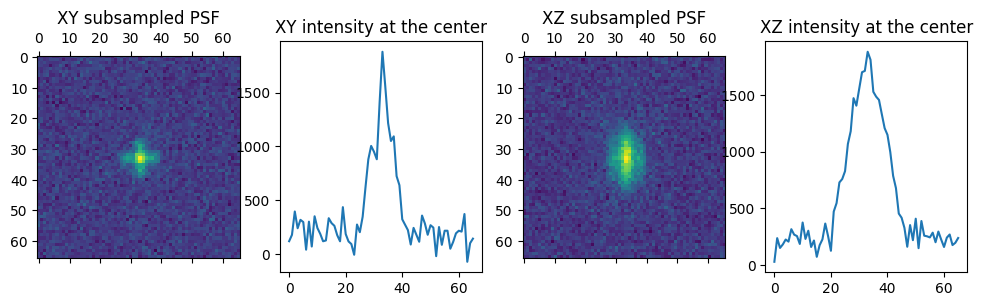

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))

ax[0].matshow(img[img.shape[0]//2, :, : ])
ax[1].plot(img[img.shape[0]//2, img.shape[0]//2, : ])
ax[2].matshow(img[:,:, img.shape[0]//2])
ax[3].plot(img[:,img.shape[0]//2, img.shape[0]//2])

ax[0].set_title("XY subsampled PSF")
ax[1].set_title("XY intensity at the center")
ax[2].set_title("XZ subsampled PSF")
ax[3].set_title("XZ intensity at the center")

Text(0.5, 1.0, 'XZ intensity at the center')

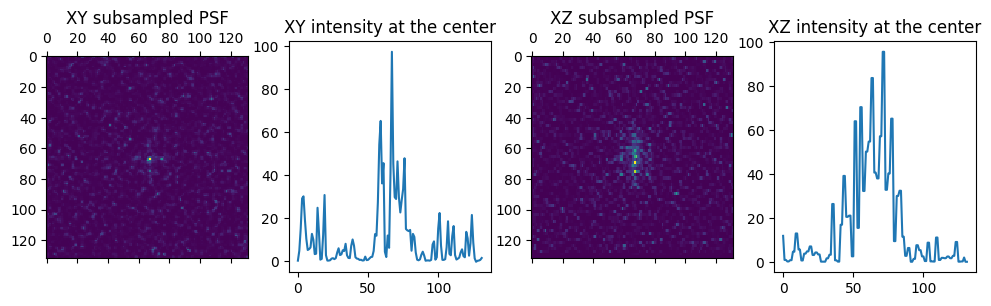

In [23]:
# Plot the profiles

fig, ax = plt.subplots(1, 4, figsize=(12, 3))

rgc_img = rgc_img.squeeze()

ax[0].matshow(rgc_img[rgc_img.shape[0]//2, :, : ])
ax[1].plot(rgc_img[rgc_img.shape[0]//2, rgc_img.shape[0]//2, : ])
ax[2].matshow(rgc_img[:,:, rgc_img.shape[0]//2])
ax[3].plot(rgc_img[:,rgc_img.shape[0]//2, rgc_img.shape[0]//2])

ax[0].set_title("XY subsampled PSF")
ax[1].set_title("XY intensity at the center")
ax[2].set_title("XZ subsampled PSF")
ax[3].set_title("XZ intensity at the center")